In [44]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
data = pd.read_csv("./train.csv")
data.shape

(1000, 12)

In [3]:
data.head(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
columns_name = list(data.columns)
columns_name

['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']

In [5]:
inp_columns = columns_name[1:-1]
inp_columns

['on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque']

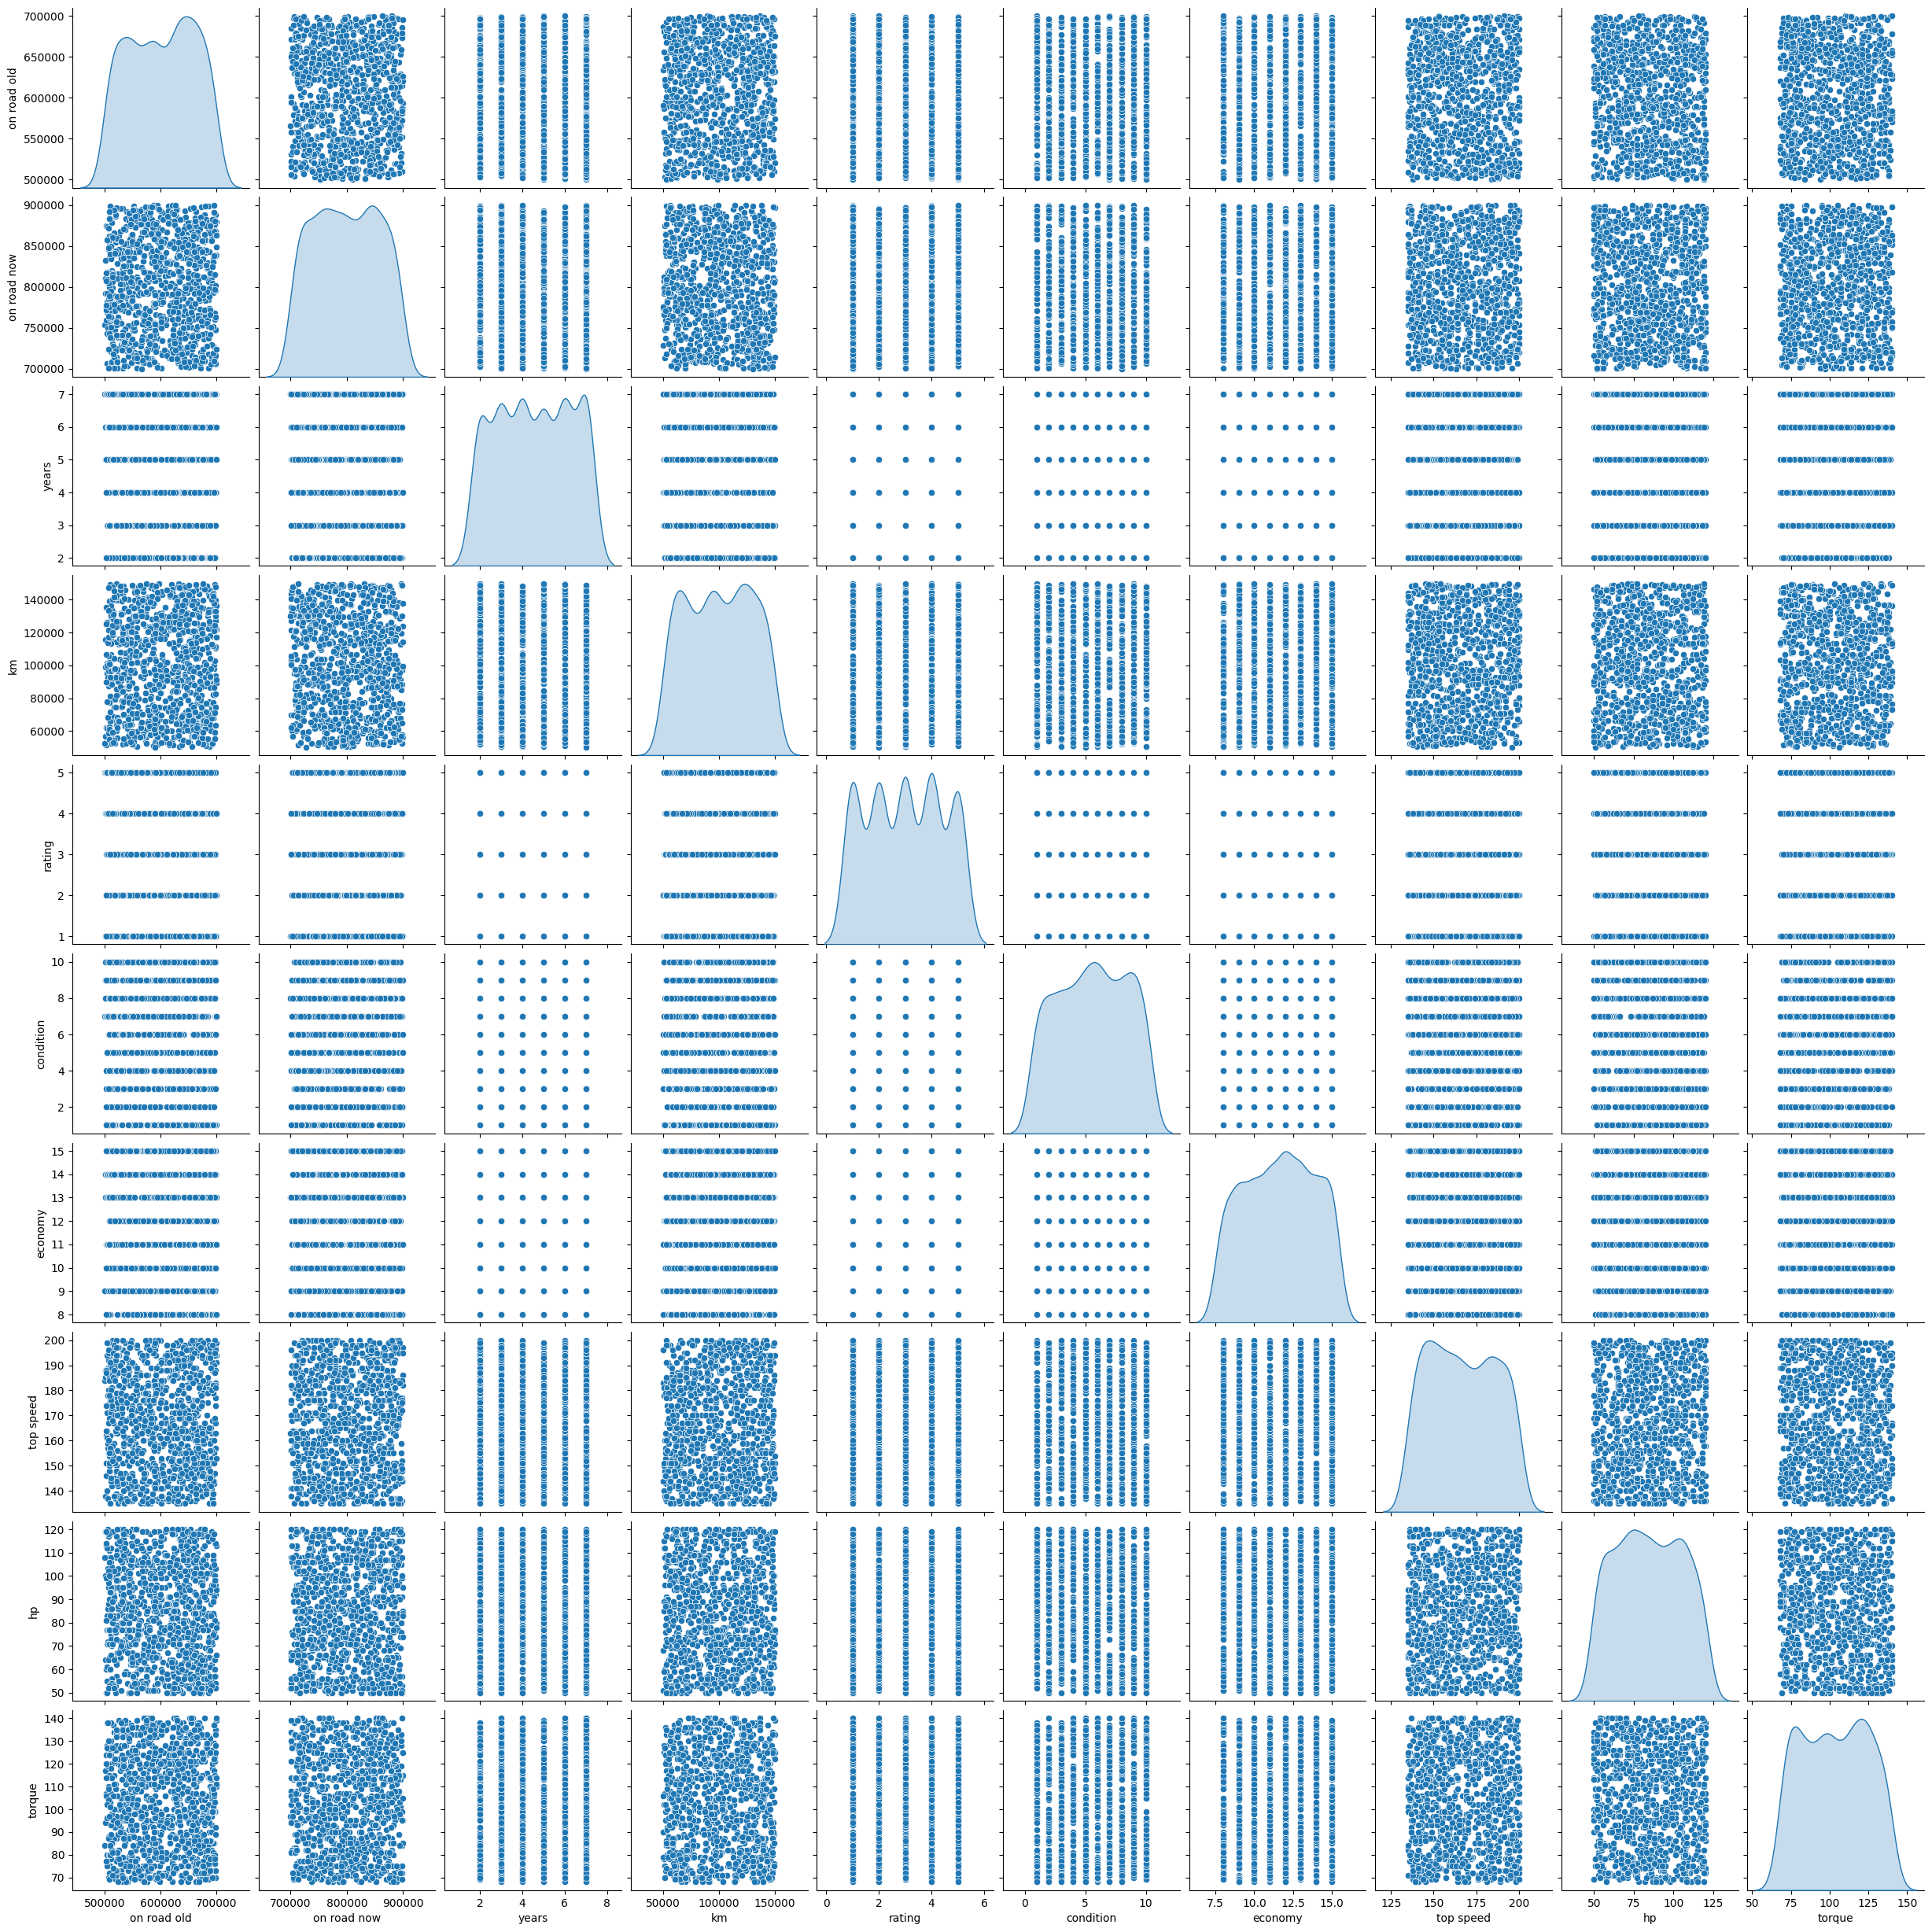

In [6]:
sns.pairplot(data[inp_columns], diag_kind='kde')

In [7]:
tensor_data = tf.constant(data)
print(tensor_data.shape)

(1000, 12)


I0000 00:00:1744560892.157562    6932 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1733 MB memory:  -> device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1


In [8]:
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [9]:
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [10]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.520000e+02 6.158010e+05 7.202310e+05 4.000000e+00 1.240420e+05
  2.000000e+00 9.000000e+00 9.000000e+00 1.390000e+02 5.300000e+01
  1.200000e+02 2.010730e+05]
 [1.210000e+02 5.737670e+05 8.636390e+05 4.000000e+00 8.742700e+04
  1.000000e+00 6.000000e+00 1.200000e+01 1.510000e+02 7.900000e+01
  7.400000e+01 3.725955e+05]
 [3.270000e+02 5.922770e+05 8.788710e+05 4.000000e+00 1.225890e+05
  1.000000e+00 9.000000e+00 8.000000e+00 2.000000e+02 9.600000e+01
  8.500000e+01 2.744535e+05]
 [1.120000e+02 6.001090e+05 8.847450e+05 7.000000e+00 7.432100e+04
  2.000000e+00 2.000000e+00 1.200000e+01 1.920000e+02 1.130000e+02
  9.500000e+01 4.370435e+05]
 [6.480000e+02 6.002240e+05 8.927850e+05 7.000000e+00 9.333500e+04
  4.000000e+00 5.000000e+00 1.300000e+01 2.000000e+02 1.150000e+02
  8.900000e+01 3.671220e+05]], shape=(5, 12), dtype=float32)


In [11]:
# print(tf.config.list_physical_devices('GPU'))

In [12]:
tensor_data.shape

TensorShape([1000, 12])

In [13]:
# input data 
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[4.00000e+00 1.24042e+05 2.00000e+00 9.00000e+00 9.00000e+00 1.39000e+02
  5.30000e+01 1.20000e+02]
 [4.00000e+00 8.74270e+04 1.00000e+00 6.00000e+00 1.20000e+01 1.51000e+02
  7.90000e+01 7.40000e+01]
 [4.00000e+00 1.22589e+05 1.00000e+00 9.00000e+00 8.00000e+00 2.00000e+02
  9.60000e+01 8.50000e+01]
 [7.00000e+00 7.43210e+04 2.00000e+00 2.00000e+00 1.20000e+01 1.92000e+02
  1.13000e+02 9.50000e+01]
 [7.00000e+00 9.33350e+04 4.00000e+00 5.00000e+00 1.30000e+01 2.00000e+02
  1.15000e+02 8.90000e+01]], shape=(5, 8), dtype=float32)


In [14]:
y = tensor_data[:, -1]
print(y.shape)
print(y[:5])

(1000,)
tf.Tensor([201073.  372595.5 274453.5 437043.5 367122. ], shape=(5,), dtype=float32)


In [15]:
y = tf.expand_dims(y, axis=-1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[201073. ]
 [372595.5]
 [274453.5]
 [437043.5]
 [367122. ]], shape=(5, 1), dtype=float32)


In [16]:
print(x.shape)

(1000, 8)


In [56]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [17]:
normaliser = Normalization()
normaliser.adapt(x)
x_norm = normaliser(x)

In [18]:
x_norm[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32650068,  0.8157491 , -0.7046623 ,  1.2072108 , -1.177429  ,
        -1.4468278 , -1.538328  ,  0.78757405],
       [-0.32650068, -0.4409487 , -1.4178834 ,  0.14452523,  0.16820414,
        -0.8243802 , -0.2704484 , -1.3978877 ],
       [-0.32650068,  0.76587933, -1.4178834 ,  1.2072108 , -1.6259733 ,
         1.7172807 ,  0.5585499 , -0.8752773 ],
       [ 1.4194926 , -0.89077204, -0.7046623 , -1.2723888 ,  0.16820414,
         1.3023156 ,  1.3875481 , -0.40017688],
       [ 1.4194926 , -0.23817468,  0.72177976, -0.20970328,  0.6167485 ,
         1.7172807 ,  1.4850774 , -0.6852371 ]], dtype=float32)>

In [19]:
x_norm.shape

TensorShape([1000, 8])

In [20]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normaliser,
    Dense(1),

    
])

/media/qsashish/DATA/ashish/tensorflow/tensor/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# model.build()

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

In [25]:
# if encounter error ref - https://github.com/XifengGuo/CapsNet-Keras/issues/7

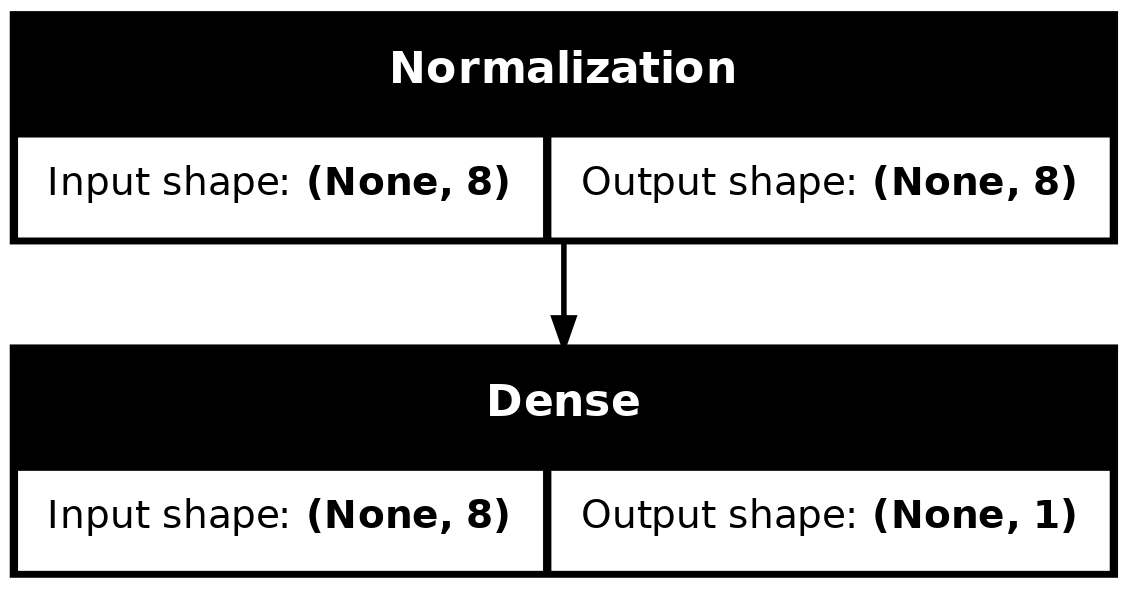

In [24]:
tf.keras.utils.plot_model(model, to_file="test.png", show_shapes=True)

In [ ]:
mse = MeanSquaredError()
# mae = MeanAbsoluteError()
# hubber = Huber(delta=0.4)

In [ ]:
# model.compile(
#     optimizer = Adam(),
#     loss=MeanSquaredError())

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.1),
    loss=MeanSquaredError(),
    metrics = [RootMeanSquaredError()]
)

In [47]:
history = model.fit(x_norm, y, epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 106168270848.0000 - root_mean_squared_error: 325807.8438  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110353096704.0000 - root_mean_squared_error: 332089.6562 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107820523520.0000 - root_mean_squared_error: 328159.0625 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105395945472.0000 - root_mean_squared_error: 324636.9062 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103217397760.0000 - root_mean_squared_error: 321231.0625 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102552969216.0000 - root_mean_squared_error: 320206.7188
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105710157824.0000 - root_mean_squared_error: 325036.3750 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102284394496.0000 - root_mean_squared_error: 319770.9062
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100457

In [50]:
history.history

{'loss': [104353701888.0,
  104289509376.0,
  104224858112.0,
  104160378880.0,
  104095375360.0,
  104030887936.0,
  103966113792.0,
  103901503488.0,
  103836622848.0,
  103772192768.0,
  103707803648.0,
  103643414528.0,
  103579189248.0,
  103515226112.0,
  103451009024.0,
  103387013120.0,
  103322566656.0,
  103258234880.0,
  103194058752.0,
  103130144768.0,
  103066116096.0,
  103001956352.0,
  102937837568.0,
  102874046464.0,
  102810189824.0,
  102746284032.0,
  102682157056.0,
  102618185728.0,
  102554443776.0,
  102490996736.0,
  102427590656.0,
  102363693056.0,
  102300131328.0,
  102236545024.0,
  102173261824.0,
  102109462528.0,
  102045474816.0,
  101981814784.0,
  101918302208.0,
  101854576640.0,
  101791178752.0,
  101727649792.0,
  101664473088.0,
  101601181696.0,
  101538111488.0,
  101474918400.0,
  101411954688.0,
  101348040704.0,
  101285093376.0,
  101222137856.0,
  101159075840.0,
  101095907328.0,
  101032747008.0,
  100970332160.0,
  100907302912.0,
  

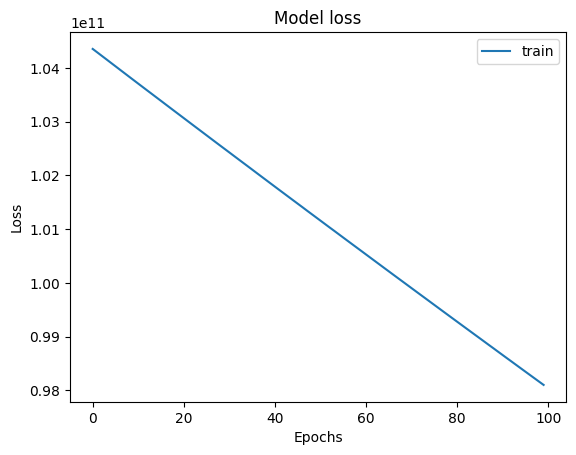

In [52]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train'])
plt.show()

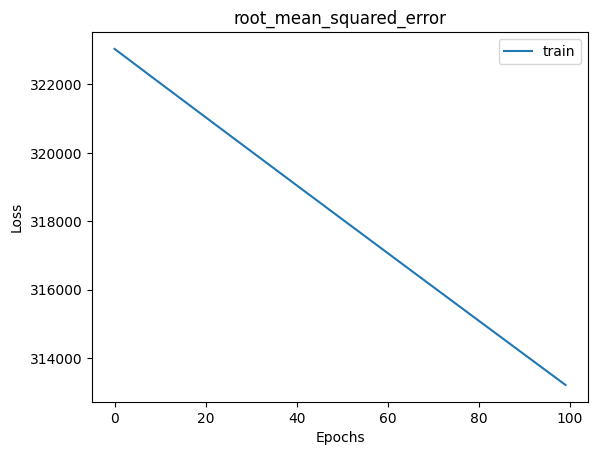

In [49]:
plt.plot(history.history['root_mean_squared_error'])
plt.title("root_mean_squared_error")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train'])
plt.show()

In [55]:
model.evaluate(x_norm,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100755447808.0000 - root_mean_squared_error: 317319.9062 


[98069307392.0, 313160.1875]

## best pratices

In [57]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [ ]:
# train test split
x_train = x_norm[: int(TRAIN_RATIO*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO* DATASET_SIZE)]

print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [61]:
x_val = x_norm[int(TRAIN_RATIO*DATASET_SIZE) : int((VAL_RATIO + TRAIN_RATIO )*DATASET_SIZE)]
y_val = y[int(TRAIN_RATIO*DATASET_SIZE):int( (VAL_RATIO + TRAIN_RATIO)* DATASET_SIZE)]

print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [71]:
model2 = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normaliser,
    Dense(1),

    
])

/media/qsashish/DATA/ashish/tensorflow/tensor/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model2.compile(
    optimizer = Adam(learning_rate=0.1),
    loss=MeanSquaredError(),    
    metrics = [RootMeanSquaredError()]
)

In [73]:
hostory = model2.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 109004210176.0000 - root_mean_squared_error: 330104.3125 - val_loss: 111449915392.0000 - val_root_mean_squared_error: 333841.1562
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113430118400.0000 - root_mean_squared_error: 336756.2188 - val_loss: 111398051840.0000 - val_root_mean_squared_error: 333763.4688
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110087462912.0000 - root_mean_squared_error: 331753.0938 - val_loss: 111346122752.0000 - val_root_mean_squared_error: 333685.6562
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112978157568.0000 - root_mean_squared_error: 336093.6875 - val_loss: 111294210048.0000 - val_root_mean_squared_error: 333607.8750
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113513816064.0000 - root_mean_squared_error: 336881.5625 - val_loss: 111242412032.0000 - val_root_mean_squared_error: 333530.2188
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [77]:
history.history

{'loss': [104353701888.0,
  104289509376.0,
  104224858112.0,
  104160378880.0,
  104095375360.0,
  104030887936.0,
  103966113792.0,
  103901503488.0,
  103836622848.0,
  103772192768.0,
  103707803648.0,
  103643414528.0,
  103579189248.0,
  103515226112.0,
  103451009024.0,
  103387013120.0,
  103322566656.0,
  103258234880.0,
  103194058752.0,
  103130144768.0,
  103066116096.0,
  103001956352.0,
  102937837568.0,
  102874046464.0,
  102810189824.0,
  102746284032.0,
  102682157056.0,
  102618185728.0,
  102554443776.0,
  102490996736.0,
  102427590656.0,
  102363693056.0,
  102300131328.0,
  102236545024.0,
  102173261824.0,
  102109462528.0,
  102045474816.0,
  101981814784.0,
  101918302208.0,
  101854576640.0,
  101791178752.0,
  101727649792.0,
  101664473088.0,
  101601181696.0,
  101538111488.0,
  101474918400.0,
  101411954688.0,
  101348040704.0,
  101285093376.0,
  101222137856.0,
  101159075840.0,
  101095907328.0,
  101032747008.0,
  100970332160.0,
  100907302912.0,
  

In [75]:

plt.plot(history.history['val_loss'])
plt.title("root_mean_squared_error")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train'])
plt.show()

KeyError: 'val_loss'

In [ ]:
model2.evaluate()